REF: https://www.marsja.se/probabilistic-programming-in-python/

In [19]:
import numpy as np
import scipy.stats as stats
import pymc3 as pm
import arviz as az
az.style.use('arviz-white')

In [16]:
np.random.seed(123)

trials = 4

theta_real = 0.35 # unknown value in a real experiment

data = stats.bernoulli.rvs(p=theta_real, size=trials)

In [17]:
with pm.Model() as our_first_model:
    θ = pm.Beta('θ', alpha=1., beta=1.) # Unknown parameter
    y = pm.Bernoulli('y', p=θ, observed=data) # label
    trace = pm.sample(1000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]
Sampling 4 chains, 0 divergences: 100%|███████████████████████████████████████| 6000/6000 [00:05<00:00, 1069.52draws/s]
The acceptance probability does not match the target. It is 0.8832139313883879, but should be close to 0.8. Try to increase the number of tuning steps.


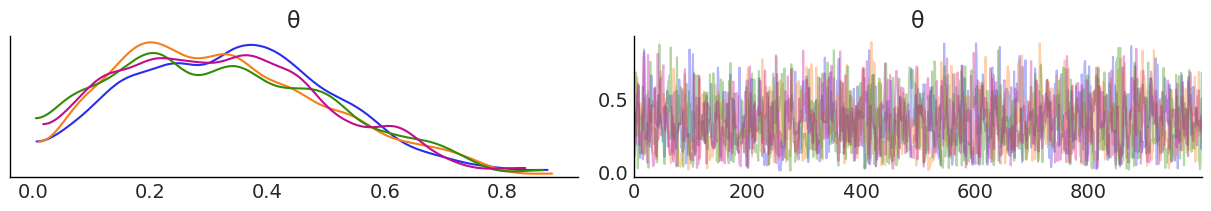

In [20]:
az.plot_trace(trace);

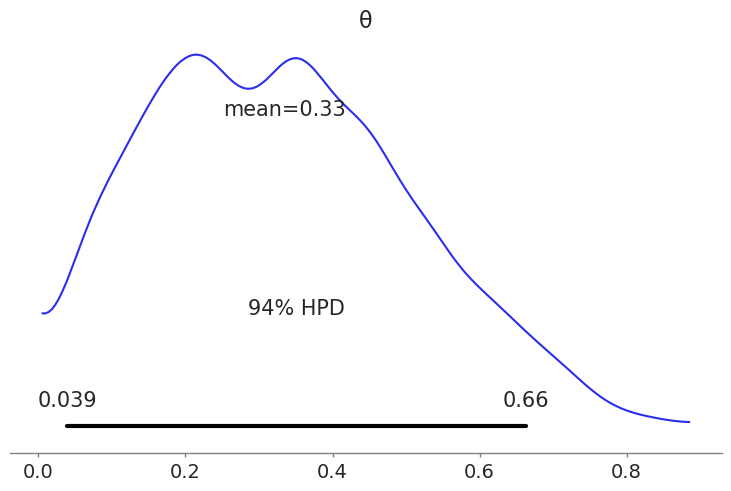

In [21]:
az.plot_posterior(trace, round_to=2);